# Lab 3: Entropy and Decision Tree
## Jonathan Reyes

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import math

## Load the dataset

In [ ]:
# Load the dataset
data = pd.read_csv("lab3_dataset.csv")

## 1. Read the data first and look at the first 5 rows. Check if there are any missing values or not (3 points)

In [4]:
# Display first 5 rows
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

First 5 rows of the dataset:
   age  likes_dog  likes_gravity  going_to_be_an_astronaut
0   24          0              0                         0
1   30          1              1                         1
2   36          0              1                         1
3   36          0              0                         0
4   42          0              0                         0

Checking for missing values:
age                         0
likes_dog                   0
likes_gravity               0
going_to_be_an_astronaut    0
dtype: int64


## 2. Split the data using sklearn's train_test_split function (5 points)

In [5]:
# Separate features and target variable
X = data.drop('going_to_be_an_astronaut', axis=1)
y = data['going_to_be_an_astronaut']

# Split data with 20% test size and random_state=5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print("Shape of training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Shape of training and testing sets:
X_train shape: (24, 3)
X_test shape: (7, 3)
y_train shape: (24,)
y_test shape: (7,)


## 3. Use the gini criterion to fit the data to the training set (5 points)

In [6]:
# Create and train Decision Tree with Gini criterion
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=5, max_depth=4)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)

## 4. Evaluate the accuracy, precision and recall for the Gini model (10 points)

In [7]:
# Calculate performance metrics for Gini model
gini_accuracy = accuracy_score(y_test, y_pred_gini)
gini_precision = precision_score(y_test, y_pred_gini)
gini_recall = recall_score(y_test, y_pred_gini)

print("Gini Model Evaluation:")
print(f"Accuracy: {gini_accuracy:.4f}")
print(f"Precision: {gini_precision:.4f}")
print(f"Recall: {gini_recall:.4f}")

Gini Model Evaluation:
Accuracy: 0.5714
Precision: 1.0000
Recall: 0.5714


### Explanation of Gini findings:

The values that are given in the metrics show that the model is very selective when classifying, based on the accuracy we can notice that the model correctly predicted the classifications correct around 57.14% of the time making it a modest model.However if we look at the precision we can tell that it has 100% perfect precision thus the model correctly predicted the positive cases but when comparing this with the recall metric we can also infer that the model only identified 57.14% of the actual positive cases, so since the model is very conservative it only predicted the positive cases when it was 100% sure it was correct leading to the high precision but the downside of missing many positve cases causing the low recall. There is many reasons for this occuring one of which can be caused by the class imbalances in the dataset or the model being tuned to minimized false positives.

## 5. Use the Entropy criterion to fit the data to the training set (2 points)

In [8]:
# Create and train Decision Tree with Entropy criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=5, max_depth=5)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)

## 6. Evaluate the accuracy, precision and recall for the Entropy model (10 points)

In [9]:
# Calculate performance metrics for Entropy model
entropy_accuracy = accuracy_score(y_test, y_pred_entropy)
entropy_precision = precision_score(y_test, y_pred_entropy)
entropy_recall = recall_score(y_test, y_pred_entropy)

print("Entropy Model Evaluation:")
print(f"Accuracy: {entropy_accuracy:.4f}")
print(f"Precision: {entropy_precision:.4f}")
print(f"Recall: {entropy_recall:.4f}")

Entropy Model Evaluation:
Accuracy: 0.2857
Precision: 1.0000
Recall: 0.2857


### Explanation of Entropy findings:
Looking at the metrics from the entropy findings we can start to confirm some of the findings from using the gini model, it is most likely that the dataset is imbalanced which lead to a low accuracy score in the entropy model of  28.57% which means the model is not performing well. However the precision is at 100% so its conservative in prediciting the correct case only when the model is 100% sure it is the correct one. The recall is also showing that is missed alot of the positive cases leading to a high amount of false negatives.

## 7. Which criteria gives the highest accuracy, precision and recall? (5 points)

In [10]:
# Compare the models
print("Comparison of models:")
if entropy_accuracy > gini_accuracy:
    best_model = "Entropy"
    best_accuracy = entropy_accuracy
    print("Entropy has higher accuracy.")
else:
    best_model = "Gini"
    best_accuracy = gini_accuracy
    print("Gini has higher accuracy.")

if entropy_precision > gini_precision:
    print("Entropy has higher precision.")
else:
    print("Gini has higher precision.")

if entropy_recall > gini_recall:
    print("Entropy has higher recall.")
else:
    print("Gini has higher recall.")

Comparison of models:
Gini has higher accuracy.
Gini has higher precision.
Gini has higher recall.


### Explanation:

Looking at the two models we can tell that the best model to use is the gini model as it performed better at handling the dataset correctly in all three of the metrics in comparison to the model that uses entropy. This can be attributed to how sensitve the entropy model is to class distributions and it lead to creating deeper trees that are more complex while the gini model handles it better by seperating the classes at each split leading to simpler splits and generalization. While the entropy model might also be more strict in the requirements to classify correctly while gini could be more relaxed leading to the better metrics.

## 8. Plot the tree for both the gini and entropy function (5 points)

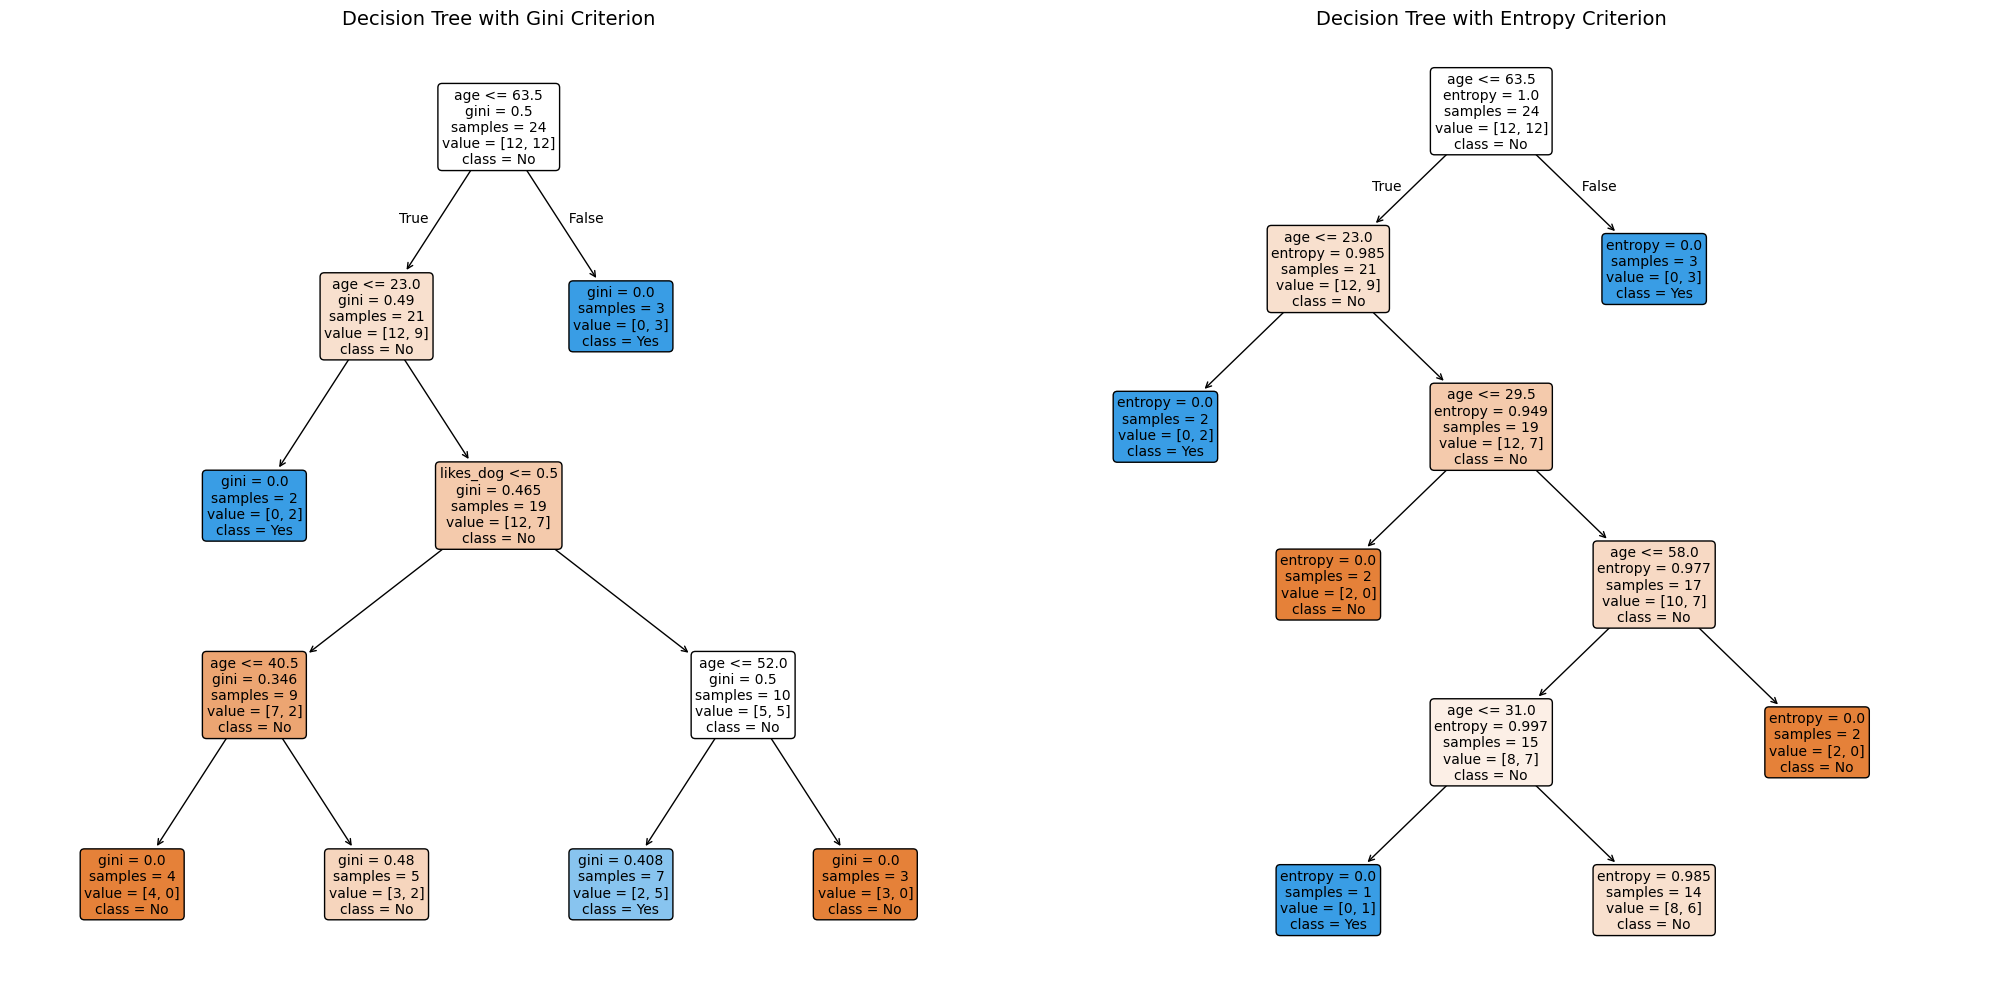

In [11]:
# Plot both trees side by side
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plot_tree(dt_gini, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree with Gini Criterion", fontsize=14)

plt.subplot(1, 2, 2)
plot_tree(dt_entropy, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree with Entropy Criterion", fontsize=14)

plt.tight_layout()
plt.show()

## 9. Predict for an individual of age 33, likes dogs but doesn't love gravity (10 points)

In [12]:
# Create data for new individual
new_individual = pd.DataFrame({
    'age': [33],
    'likes_dog': [1],
    'likes_gravity': [0]
})

# Use the model with the highest accuracy to predict
if best_model == "Entropy":
    prediction = dt_entropy.predict(new_individual)
else:
    prediction = dt_gini.predict(new_individual)

print("Prediction for individual with age 33, likes dogs but doesn't love gravity:")
if prediction[0] == 1:
    print("This individual is predicted to become an astronaut.")
else:
    print("This individual is predicted not to become an astronaut.")

Prediction for individual with age 33, likes dogs but doesn't love gravity:
This individual is predicted to become an astronaut.


## 10. Find the best max_depth for entropy and Gini (10 points)

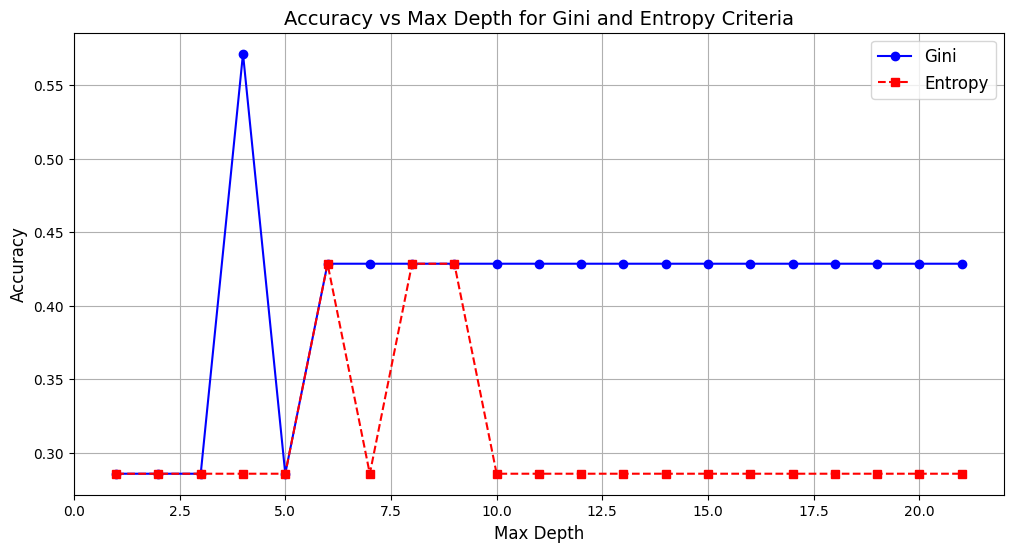

Best max_depth for Gini: 4
Best max_depth for Entropy: 6


In [13]:
# Test various depths to find optimal value
max_depths = range(1, 22)
gini_accuracies = []
entropy_accuracies = []

for depth in max_depths:
    # Gini model
    dt_gini = DecisionTreeClassifier(criterion='gini', random_state=5, max_depth=depth)
    dt_gini.fit(X_train, y_train)
    y_pred_gini = dt_gini.predict(X_test)
    gini_accuracies.append(accuracy_score(y_test, y_pred_gini))
    
    # Entropy model
    dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=5, max_depth=depth)
    dt_entropy.fit(X_train, y_train)
    y_pred_entropy = dt_entropy.predict(X_test)
    entropy_accuracies.append(accuracy_score(y_test, y_pred_entropy))

# Find best depths
best_gini_depth = max_depths[np.argmax(gini_accuracies)]
best_entropy_depth = max_depths[np.argmax(entropy_accuracies)]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(max_depths, gini_accuracies, marker='o', linestyle='-', color='blue', label='Gini')
plt.plot(max_depths, entropy_accuracies, marker='s', linestyle='--', color='red', label='Entropy')
plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs Max Depth for Gini and Entropy Criteria', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

print(f"Best max_depth for Gini: {best_gini_depth}")
print(f"Best max_depth for Entropy: {best_entropy_depth}")

### Explanation for different best depths:

Looking at the two models we can see that the gini models best depth was at 4 while the best depth for entropy is at 6, this can be confirmed by looking at the performance metrics we took from earlier for the two models, Gini should have the smalled max depth since it tends to favor the most frequent class at each split, this leads to simpler trees being constructed with fewer levels, however entropy considers the overall distribution of the class probabilities leading to more complext trees that run deeper in order to reduce the uncertainty. Also if the dataset is imbalanced gini will reach its most optimal depth faster since it created the simpler splits, while it is the opposite for entropy based models since it will benefit from the additional splits before it starts to overfit the model.

## 11. Calculate the root's entropy (10 points)

In [14]:
# Count the number of people who became astronauts and those who didn't
astronaut_counts = data['going_to_be_an_astronaut'].value_counts()
total_samples = len(data)

# Calculate probabilities
p_yes = astronaut_counts.get(1, 0) / total_samples
p_no = astronaut_counts.get(0, 0) / total_samples

# Calculate entropy
if p_yes == 0 or p_no == 0:
    root_entropy = 0
else:
    root_entropy = -p_yes * math.log2(p_yes) - p_no * math.log2(p_no)

print(f"Root Entropy: {root_entropy:.4f}")
print(f"Probability of becoming an astronaut (p_yes): {p_yes:.4f}")
print(f"Probability of not becoming an astronaut (p_no): {p_no:.4f}")

Root Entropy: 0.9629
Probability of becoming an astronaut (p_yes): 0.6129
Probability of not becoming an astronaut (p_no): 0.3871


## 12. Create pivot table for likes_dog vs going_to_be_an_astronaut (5 points)

In [15]:
# Create pivot table
pivot_table = pd.crosstab(data['likes_dog'], data['going_to_be_an_astronaut'])
print("Pivot Table (likes_dogs vs going_to_be_an_astronaut):")
print(pivot_table)

# Add column and row totals for clarity
pivot_with_totals = pd.crosstab(
    data['likes_dog'], 
    data['going_to_be_an_astronaut'], 
    margins=True, 
    margins_name='Total'
)
print("\nPivot Table with Totals:")
print(pivot_with_totals)

Pivot Table (likes_dogs vs going_to_be_an_astronaut):
going_to_be_an_astronaut  0   1
likes_dog                      
0                         7   7
1                         5  12

Pivot Table with Totals:
going_to_be_an_astronaut   0   1  Total
likes_dog                              
0                          7   7     14
1                          5  12     17
Total                     12  19     31


## 13. Calculate entropy for liking dogs vs not liking dogs, then find the Information Gain (20 points)

In [16]:
# Get counts for each group
likes_dogs_counts = pivot_table.loc[1]
not_likes_dogs_counts = pivot_table.loc[0]

# Calculate total samples in each group
likes_dogs_total = likes_dogs_counts.sum()
not_likes_dogs_total = not_likes_dogs_counts.sum()

# Calculate probabilities
p_likes_dogs_yes = likes_dogs_counts.get(1, 0) / likes_dogs_total if likes_dogs_total > 0 else 0
p_likes_dogs_no = likes_dogs_counts.get(0, 0) / likes_dogs_total if likes_dogs_total > 0 else 0

p_not_likes_dogs_yes = not_likes_dogs_counts.get(1, 0) / not_likes_dogs_total if not_likes_dogs_total > 0 else 0
p_not_likes_dogs_no = not_likes_dogs_counts.get(0, 0) / not_likes_dogs_total if not_likes_dogs_total > 0 else 0

# Display the probabilities
print("Probabilities for each group:")
print(f"P(astronaut=Yes | likes_dogs=Yes): {p_likes_dogs_yes:.4f}")
print(f"P(astronaut=No | likes_dogs=Yes): {p_likes_dogs_no:.4f}")
print(f"P(astronaut=Yes | likes_dogs=No): {p_not_likes_dogs_yes:.4f}")
print(f"P(astronaut=No | likes_dogs=No): {p_not_likes_dogs_no:.4f}")

# Calculate entropy for each group
if p_likes_dogs_yes == 0 or p_likes_dogs_no == 0:
    entropy_likes_dogs = 0
else:
    entropy_likes_dogs = -p_likes_dogs_yes * math.log2(p_likes_dogs_yes) - p_likes_dogs_no * math.log2(p_likes_dogs_no)

if p_not_likes_dogs_yes == 0 or p_not_likes_dogs_no == 0:
    entropy_not_likes_dogs = 0
else:
    entropy_not_likes_dogs = -p_not_likes_dogs_yes * math.log2(p_not_likes_dogs_yes) - p_not_likes_dogs_no * math.log2(p_not_likes_dogs_no)

print(f"\nEntropy for likes_dogs=Yes: {entropy_likes_dogs:.4f}")
print(f"Entropy for likes_dogs=No: {entropy_not_likes_dogs:.4f}")

# Calculate weighted average entropy after split
weighted_entropy = (likes_dogs_total / total_samples) * entropy_likes_dogs + (not_likes_dogs_total / total_samples) * entropy_not_likes_dogs

# Calculate information gain
information_gain = root_entropy - weighted_entropy

print(f"\nRoot Entropy (before split): {root_entropy:.4f}")
print(f"Weighted Average Entropy (after split): {weighted_entropy:.4f}")
print(f"Information Gain: {information_gain:.4f}")

Probabilities for each group:
P(astronaut=Yes | likes_dogs=Yes): 0.7059
P(astronaut=No | likes_dogs=Yes): 0.2941
P(astronaut=Yes | likes_dogs=No): 0.5000
P(astronaut=No | likes_dogs=No): 0.5000

Entropy for likes_dogs=Yes: 0.8740
Entropy for likes_dogs=No: 1.0000

Root Entropy (before split): 0.9629
Weighted Average Entropy (after split): 0.9309
Information Gain: 0.0320


### Explanation of findings:

After calculating all the probabilities, and the entropy and found that the information gain was 0.0320 which means the value that we want to use to predict if it leads to being a astronaut is weak. Because of the small information gain it means that likes_dogs is a weak predictor for becoming a astronaut, also if we look at the entropy levels we can notice that there is a high level of uncertainty for both likes_dogs and doesnt_like_dogs